**Homework 4**

We begin with the usual imports, and some new ones!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from matplotlib.pyplot import imshow

The following code block loads the `digits` dataset as a Pandas DataFrame. Each row of this dataset represents the pixel intensity (on a scale of 0 to 255) in an 8x8 image of a handwritten digit. There are 1797 images represented here.

In [ ]:
digits=load_digits(as_frame=True).data
digits.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


To display an image represented by a particluar row, we can use the `imshow` command from matplotlib.pyplot. For example, the following code block will show you the image represented by the pixel values in row 100.

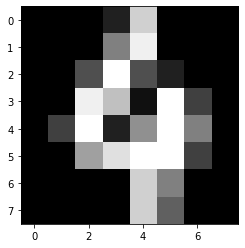

In [ ]:
imshow(np.array(digits.iloc[100,:]).reshape((8,8)),cmap='gray')

The next block loads the `target` Series that accompanies the digits dataset. Each entry is one of the digits 0-9, which tells us what the corresponding image is of in the digits dataset. For example, the image above is clearly the number "4". So we see that entry 100 in the target Series is 4.

In [ ]:
target=load_digits().target
target[100]

4

The goal of this assignment is to determine to what extent images of the same digit are clustered within the space of all possible 8x8 images. To determine this, you will implement the KMeans algorithm, as described in class.

Your first task is to write a function that takes a dataset like `digits`, and a Series like `target` of labels for each row, and returns a DataFrame whose rows are the centers of all the points in `data` with the same label.

For example, if there are 1797 rows of `data` (like in the `digits` dataset), and each row has 64 enties ("features"), then `data` will be a DataFrame of shape (1797,64). If there are 10 different kind of labels in in the `labels` Series, then the function you will write will output a DataFrame of shape (10,64). The first row contains the coordinates of the center of all points in `data` with label 1, the second the center of all points with label 2, etc.

In [ ]:
from pandas.core.groupby import groupby
def centers_from_labels(data,labels):
  new = pd.DataFrame(data)
  #new['labels'] = labels
  new = new.groupby(by=labels).mean()
  return new

Next, create a function called `sq_distances`. The columns of the DataFrame this returns should be the distances to the corresponding center. So, for example if `centers` has 10 rows, then there are 10 centers. Column 1 of `sq_distances(data,centers)` should be the squared distance from each point (row) of `data` to center 1. Column 2 should be the squared distances to center 2, etc. If `data` has shape (n,m) and centers has shape (k,m), then `sq_distances(data,centers)` should have shape (n,k).

In [ ]:
def sq_distances(data,centers):
  distance1 = data.to_numpy()
  distance2 = centers.to_numpy()
  distance = np.apply_along_axis(lambda x: np.sum(np.square(x-distance1),axis=1),1,distance2)
  return pd.DataFrame(distance.T)


Now write a function that produces a Series, containing the number of the center that is closest to each point (row) in `data`.

In [ ]:
def labels_from_centers(data,centers):
 sq_distancesofdata = sq_distances(data, centers)
 label = sq_distancesofdata.idxmin(axis=1)
 return label

If you have completed the previous problems correctly, the following code block should define the KMeans clustering algorithm. Make sure you understand it!

In [ ]:
def KMeans(data,k):
  centers=data.sample(n=k,random_state=1)
  labels=labels_from_centers(data,centers)
  diff=10

  while diff!=0:
    old_labels=labels
    centers=centers_from_labels(data,old_labels)
    labels=labels_from_centers(data,centers)
    diff=np.sum((old_labels-labels)**2)
    print(diff)
  return labels

Run the next code block to find 10 clusters in the `digits` dataset, and assign each row to a cluster. You'll see the algorithm converging as it runs.

In [ ]:
clusters=KMeans(digits,10)

6480
4084
2896
3121
1618
418
153
203
81
121
324
189
69
89
54
39
46
1
1
10
9
9
9
0


Next, we want to examine the correspondence between the clusters generated by KMeans and the numerals represented by the images in `digits`. Create a function which takes `clusters`, `target` and `k`, and produces a Numpy array of shape (k,k). The (i,j) entry should represent the number of rows in `digits` that were in cluster i, and represent digit j.

In [ ]:
#np.sum((clusters==2) & (target==0))
#np.ones((10,10))

In [ ]:
def confusion_matrix(clusters,target,k):
  image=np.ones((k,k))
  for i in range(k):
    for j in range(k):
        image[i][j]=np.sum((clusters==i) & (target==j))
  return image

In [ ]:
confusion_matrix(clusters,target,10)

array([[  0.,  25., 151.,   1.,   0.,   0.,   0.,   0.,   3.,   0.],
       [  0.,   1.,   0.,   2.,   2.,  84.,   0.,   0.,   9.,   4.],
       [177.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   3.,   6.,   8.,   0.,   0., 177.,   2.,   7.],
       [  0.,  54.,   2.,   0.,   3.,   0.,   0.,   0.,   4.,  20.],
       [  0.,   0.,  12., 161.,   0.,  11.,   0.,   0.,   2., 126.],
       [  0.,   2.,   0.,   0.,   0.,   1., 176.,   0.,   2.,   0.],
       [  0., 100.,   8.,   7.,   2.,   0.,   3.,   2.,  87.,   1.],
       [  0.,   0.,   0.,   6.,   0.,  85.,   1.,   0.,  65.,  22.],
       [  1.,   0.,   0.,   0., 166.,   1.,   0.,   0.,   0.,   0.]])

Notice that in almost every row there is one number that is significantly larger than the rest. For example, the number 151 should be in row 0, column 2. That means that 151 of the points in cluster 0 are images of the numeral 2. Only 29 points in this cluster are images of other numerals.

We can now measure to what extent the digits are in distinct clusters. We simply take the largest number in each row, and divide it by the total number of images in `digits`. The result will be a number between 0 and 1 that tells you what percent of the images are in clusters that correlate to digits. Run the following code block to see it.

In [ ]:
matrix=confusion_matrix(clusters,target,10)
np.sum(matrix.max(axis=1))/np.sum(matrix)

0.7406789092932665

You should end up with a number around 75%. One way to interpret this is that if you were to guess which numeral is represented by a given image according to it's cluster, you'd be correct 75% of the time. While that may seem low (KNN, for example, might do better), keep in mind:
1. This is an unsupervised algorithm. Unlike KNN, we don't need the `target` data to implement the algorithm (only to check its accuracy).
2. 75% is MUCH higher than 10%, which is how often you'd be correct if you just randomly guessed.
3. Some of the clusters are more distinct. For example, if we just wanted to determine if a given image is a "0" or not, we just check if it represents a point in cluster 2. The accuracy of that will be much higher, since almost all "0"'s are in cluster 2 (177 out of 178), and very few points in cluster 2 are not "0" (only 2 out of 179).